In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
    

Text(0, 0.5, 'Observed pdf')

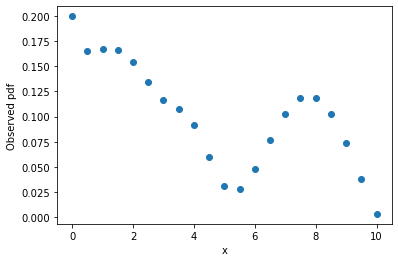

In [7]:
xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 
      5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
ys = [0.2, 0.165, 0.167, 0.166, 0.154, 0.134, 0.117, 
      0.108, 0.092, 0.06, 0.031, 0.028, 0.048, 0.077, 
      0.103, 0.119, 0.119, 0.103, 0.074, 0.038, 0.003]
plt.scatter(xs,ys)
plt.xlabel('x')
plt.ylabel('Observed pdf')

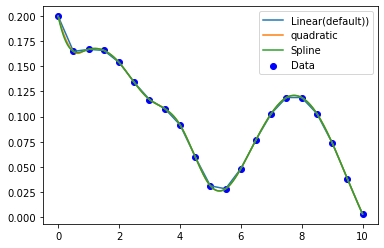

In [8]:
x = np.linspace(min(xs),max(xs),1000)
y1=interp1d(xs,ys)(x)# interp1d - interpolate in 1d using xs,ys and returns the function, and f inds the function values @x
plt.scatter(xs,ys, label='Data',c='b')
plt.plot(x,y1, label='Linear(default))')

y2=interp1d(xs,ys, kind ='quadratic')(x)
plt.plot(x,y2, label='quadratic')

from scipy.interpolate import splrep,splev
y3=splev(x,splrep(xs,ys))
plt.plot(x,y3, label='Spline')
plt.legend();

In [31]:
from scipy.integrate import simps

def get_prob(xs,ys,a, b, resolution = 1000):
    x_norm = np.linspace(min(xs),max(xs),resolution)
    y_norm = interp1d(xs,ys,kind = 'quadratic')(x_norm)
    normalisation= simps(y_norm,x= x_norm)
    x_vals = np.linspace(a,b,resolution)
    y_vals = interp1d(xs,ys,kind = 'quadratic')(x_vals)
    return simps (y_vals,x=x_vals)/normalisation

def get_cdf(xs,ys,v):
    return get_prob(xs,ys,min(xs),v)

def get_sf(xs,ys,v):
    return get_prob(xs,ys,v, max(xs))
print(get_prob(xs,ys,6,9.3))

0.31213780863878404


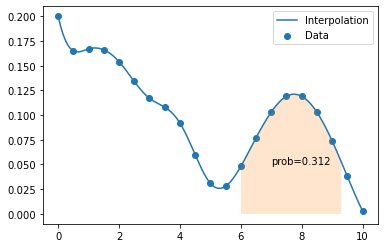

In [32]:
v1,v2 = 6,9.3
area = get_prob(xs,ys,v1,v2)

plt.scatter(xs,ys,label='Data')
plt.plot(x,y3,linestyle='-',label='Interpolation')
plt.fill_between(x,0,y3, where = (x>=v1)&(x<=v2),alpha=0.2)
plt.annotate(f'prob={area:0.3f}',(7,0.05))
plt.legend();
